In [1]:
import nltk
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [2]:
df_tweets = pd.read_csv("gs://datasetsanalysis/Twitter_Emotion_Dataset.csv")
df_tweets.isna().sum()

label    0
tweet    0
dtype: int64

In [3]:
# tweets_data = df_tweets.drop(columns={'Unnamed: 0', 'index', 'id', 'conversation_id', 'created_at', 'timezone', 'user_id', 'name', 'place', 'mentions', \
#                                    'urls', 'photos', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo', \
#                                    'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', \
#                                    'trans_src', 'trans_dest'}, axis=1)
# tweets_data.head()
df_tweets.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [4]:
df_tweets = df_tweets.drop_duplicates()
df_tweets.duplicated().sum()

0

In [106]:
import re
import itertools
import string
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
# !pip install sastrawi

In [89]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df_tweets['tweet'] = df_tweets['tweet'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df_tweets['tweet'] = df_tweets['tweet'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_tweets['tweet_tokens'] = df_tweets['tweet'].apply(word_tokenize_wrapper)

def normalizing_words(review):
    return ''.join(''.join(s)[:1] for _, s in itertools.groupby(review))

def preprocess(text):
    text = text.strip()
    text = text.lower()
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    text = re.sub(' +', ' ', text).strip()
    text = re.sub(r'\d+', '', text)
    return text

print('Tokenizing Result : \n') 
print(df_tweets['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0    [Soal, jln, Jatibarupolisi, tdk, bs, GERTAK, g...
1    [Sesama, cewe, lho, kayaknya, harusnya, bisa, ...
2    [Kepingin, gudeg, mbarek, Bu, hj, Amad, Foto, ...
3    [Jln, Jatibarubagian, dari, wilayah, Tn, Abang...
4    [Sharing, pengalaman, aja, kemarin, jam, batal...
Name: tweet_tokens, dtype: object






In [59]:
def freqDist_wrapper(text):
    return FreqDist(text)

df_tweets['tweet_tokens_fdist'] = df_tweets['tweet_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df_tweets['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(tdk, 2), (gubernur, 2), (USERNAME, 2), (Soal...
1    [(rasain, 2), (yang, 2), (Sesama, 1), (cewe, 1...
2    [(Kepingin, 1), (gudeg, 1), (mbarek, 1), (Bu, ...
3    [(wilayah, 2), (Jln, 1), (Jatibarubagian, 1), ...
4    [(di, 2), (Sharing, 1), (pengalaman, 1), (aja,...
Name: tweet_tokens_fdist, dtype: object


In [6]:
def preprocess_tweet(tweet):
    tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    output = stemmer.stem(tweet)
    
    return output

In [7]:
tweets_preprocessed = df_tweets['tweet'].apply(preprocess_tweet)

In [21]:
tweets_preprocessed

0       soal jln jatibarupolisi tdk bs gertak gubernur...
1       sama cewe lho kayak harus bisa lebih rasain la...
2       kepingin gudeg mbarek bu hj amad foto dari goo...
3       jln jatibarubagian dari wilayah tn abangpengat...
4       sharing alam aja kemarin jam 1800 batalin tike...
                              ...                        
4396    tahu kamu bahwa saat itu papa mejam mata dan t...
4397    sulit tetap calon wapresnya jokowi di pilpres ...
4398    5 masa depan nggak jelas lha iya gimana mau je...
4399    username dulu beneran ada mahasiswa teknik ui ...
4400    ya allah hanya engkau yang tahu rasa sakit di ...
Name: tweet, Length: 4390, dtype: object

In [60]:
tweets_preprocessed.to_csv('tweets_preprocessed.csv')

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [78]:
data = {'Tweets': tweets_preprocessed}
df_preprocessed = pd.DataFrame(data)

In [79]:
df_preprocessed.head()

,Tweets
0,soal jln jatibarupolisi tdk bs gertak gubernur...
1,sama cewe lho kayak harus bisa lebih rasain la...
2,kepingin gudeg mbarek bu hj amad foto dari goo...
3,jln jatibarubagian dari wilayah tn abangpengat...
4,sharing alam aja kemarin jam 1800 batalin tike...


In [90]:
df_preprocessed['Tweets'] = df_preprocessed['Tweets'].apply(lambda x: preprocess(str(x)))

In [91]:
df_preprocessed.head()

,Tweets
0,soal jln jatibarupolisi tdk bs gertak gubernur...
1,sama cewe lho kayak harus bisa lebih rasain la...
2,kepingin gudeg mbarek bu hj amad foto dari goo...
3,jln jatibarubagian dari wilayah tn abangpengat...
4,sharing alam aja kemarin jam batalin tiket di...


In [103]:
!kaggle datasets download -d ilhamfp31/word2vec-100-indonesian

 97%|██████████████████████████████████████▋ | 295M/305M [00:03<00:00, 94.9MB/s]
100%|████████████████████████████████████████| 305M/305M [00:03<00:00, 82.1MB/s]


In [104]:
!unzip word2vec-100-indonesian.zip

Archive:  word2vec-100-indonesian.zip
  inflating: idwiki_word2vec_100.model  
  inflating: idwiki_word2vec_100.model.trainables.syn1neg.npy  
  inflating: idwiki_word2vec_100.model.wv.vectors.npy  


In [115]:
path = 'word2vec/idwiki_word2vec_100.model'
id_w2v = gensim.models.word2vec.Word2Vec.load(path)
print(id_w2v.most_similar('cewe'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('cewek', 0.8540853261947632), ('cowo', 0.8269037008285522), ('cowok', 0.8111810684204102), ('temen', 0.779466986656189), ('bule', 0.7218682765960693), ('abis', 0.7044062614440918), ('mupeng', 0.6950250267982483), ('tuh', 0.6821547746658325), ('ceweknya', 0.6821222305297852), ('banget', 0.6735192537307739)]


In [159]:
unique_string = set()
for x in tweets_preprocessed:
    for y in x.split():
        unique_string.add(y)
        
len(unique_string)

15644

In [171]:
df_tweets['label_id'] = df_tweets['label'].factorize()[0]
from io import StringIO
kategori_id_data = df_tweets[['label', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['label_id', 'label']].values)

In [172]:
id_to_kategori

{0: 'anger', 1: 'happy', 2: 'sadness', 3: 'love', 4: 'fear'}

In [173]:
y_list = list(df_tweets['label_id'])
y_new = np.array(y_list)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['Tweets'], y_new, test_size=0.1, random_state=0)

In [263]:
X_train

3966    acuh aja orang yg komentar seperti itu team t ...
88      orang yg pernah kalah dalam tarung politik sul...
3160    btw panjang jl jakarta bahaya banget ya banyak...
291     kl ga bukti ga perlu kabur tuh bangsat cabul l...
4366    kadang aku asa sesuatu takut takut akan tidak ...
                              ...                        
1033    tidak semua tempat kita boleh laksana sholat s...
3270    username username takut ulat juga nyata ku tyd...
1657    baca thread fangirl mahasiswa anti kupu tuh ra...
2612    username tapi suka ku inya tu dingin orgnya ta...
2737    gatau sejak kapan tiap dengerin kucing ngeong ...
Name: Tweets, Length: 3951, dtype: object

In [264]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [265]:
X_train_counts

<3951x13999 sparse matrix of type '<class 'numpy.int64'>'
	with 96368 stored elements in Compressed Sparse Row format>

In [266]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [267]:
a = count_vect.transform(X_test)
X_coba = tfidf_transformer.fit_transform(a).toarray()

y_pred = LR_model.predict(X_coba)


In [268]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred) * 100)

[[77  9 11  0  1]
 [ 9 73 15  3  2]
 [22 18 63  5  3]
 [ 4  5  6 53  0]
 [ 6  5 11  2 36]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        98
           1       0.66      0.72      0.69       102
           2       0.59      0.57      0.58       111
           3       0.84      0.78      0.81        68
           4       0.86      0.60      0.71        60

    accuracy                           0.69       439
   macro avg       0.72      0.69      0.70       439
weighted avg       0.70      0.69      0.69       439

68.79271070615034


In [269]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [270]:
b = count_vect.transform(X_test)
X_coba2 = tfidf_transformer.fit_transform(b).toarray()

y_pred2 = clf.predict(X_coba2)

In [271]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))

[[90  1  7  0  0]
 [23 58 20  1  0]
 [31  8 71  1  0]
 [ 6  8 35 19  0]
 [21  4 23  1 11]]
              precision    recall  f1-score   support

           0       0.53      0.92      0.67        98
           1       0.73      0.57      0.64       102
           2       0.46      0.64      0.53       111
           3       0.86      0.28      0.42        68
           4       1.00      0.18      0.31        60

    accuracy                           0.57       439
   macro avg       0.72      0.52      0.51       439
weighted avg       0.67      0.57      0.54       439

0.5671981776765376


In [272]:
SVM_model = svm.SVC()
SVM_model.fit(X_train_tfidf, y_train) 

SVC()

In [273]:
c = count_vect.transform(X_test)
X_coba3 = tfidf_transformer.fit_transform(c).toarray()

y_pred3 = SVM_model.predict(X_coba3)

In [274]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test, y_pred3))

[[78  8 11  0  1]
 [10 70 19  2  1]
 [23 15 65  5  3]
 [ 4  5  8 51  0]
 [ 8  5 13  2 32]]
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        98
           1       0.68      0.69      0.68       102
           2       0.56      0.59      0.57       111
           3       0.85      0.75      0.80        68
           4       0.86      0.53      0.66        60

    accuracy                           0.67       439
   macro avg       0.72      0.67      0.68       439
weighted avg       0.69      0.67      0.67       439

0.6742596810933941


In [275]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [281]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_tfidf, y_train)
    yhat_knn=neigh.predict(X_coba3)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])
mean_acc

array([0.42596811, 0.43963554, 0.46924829, 0.46469248, 0.50113895,
       0.51025057, 0.50569476, 0.51708428, 0.53302961, 0.53986333,
       0.54441913, 0.54669704, 0.54214123, 0.54214123, 0.54669704,
       0.54897494, 0.53986333, 0.54669704, 0.53758542, 0.53530752,
       0.53302961, 0.54214123, 0.53530752, 0.53302961, 0.52164009,
       0.53302961, 0.53986333, 0.54669704, 0.55353075, 0.54897494,
       0.56036446, 0.56492027, 0.55580866, 0.56719818, 0.55353075,
       0.56947608, 0.54897494, 0.55353075, 0.56719818, 0.56492027,
       0.55353075, 0.55353075, 0.55808656, 0.55353075, 0.56036446,
       0.56947608, 0.56947608, 0.56719818, 0.56264237, 0.56719818,
       0.55580866, 0.55580866, 0.54897494, 0.56036446, 0.56492027,
       0.56947608, 0.56947608, 0.56264237, 0.56264237, 0.56036446,
       0.55353075, 0.54441913, 0.55125285, 0.54897494, 0.54897494,
       0.54897494, 0.55353075, 0.56036446, 0.56264237, 0.56264237,
       0.56036446, 0.55808656, 0.55580866, 0.55580866, 0.55353

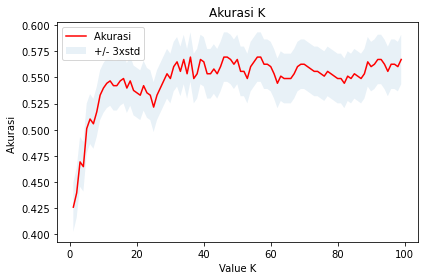

In [286]:
plt.plot(range(1, Ks), mean_acc, 'r')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Akurasi ', '+/- 3xstd'))
plt.ylabel('Akurasi ')
plt.xlabel('Value K')
plt.title('Akurasi K')
plt.tight_layout()
plt.show()

In [283]:
print("Akurasi tertinggi adalah %.2f"% mean_acc.max(), "dengan nilai K=", mean_acc.argmax()+1) 

Akurasi tertinggi adalah 0.57 dengan nilai K= 36


In [284]:
kNN_model = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train_tfidf, y_train)
yhat_knn=neigh.predict(X_coba3)

In [285]:
print(confusion_matrix(y_test,yhat_knn))
print(classification_report(y_test,yhat_knn))
print(accuracy_score(y_test, yhat_knn))

[[74  3 16  4  1]
 [16 36 27 15  8]
 [20  9 51 22  9]
 [ 2  1  2 61  2]
 [ 9  1  9 14 27]]
              precision    recall  f1-score   support

           0       0.61      0.76      0.68        98
           1       0.72      0.35      0.47       102
           2       0.49      0.46      0.47       111
           3       0.53      0.90      0.66        68
           4       0.57      0.45      0.50        60

    accuracy                           0.57       439
   macro avg       0.58      0.58      0.56       439
weighted avg       0.59      0.57      0.55       439

0.5671981776765376


In [287]:
from sklearn.tree import DecisionTreeClassifier

In [289]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DT.fit(X_train_tfidf, y_train)
predDT = DT.predict(X_coba3)

In [298]:
print("Akurasi Decision Tree: ", metrics.accuracy_score(y_test, predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))
print(accuracy_score(y_test, predDT))

Akurasi Decision Tree:  0.4510250569476082
[[29  0 66  2  1]
 [20  3 72  5  2]
 [12  0 87 10  2]
 [ 3  2 13 50  0]
 [ 5  0 25  1 29]]
              precision    recall  f1-score   support

           0       0.42      0.30      0.35        98
           1       0.60      0.03      0.06       102
           2       0.33      0.78      0.47       111
           3       0.74      0.74      0.74        68
           4       0.85      0.48      0.62        60

    accuracy                           0.45       439
   macro avg       0.59      0.47      0.44       439
weighted avg       0.55      0.45      0.41       439

0.4510250569476082


In [292]:
from sklearn.ensemble import RandomForestClassifier

In [297]:
RF = RandomForestClassifier()
RF.fit(X_train_tfidf,y_train)
pred_RF=clf.predict(X_coba3)

In [299]:
print(confusion_matrix(y_test,pred_RF))
print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))

[[90  1  7  0  0]
 [23 58 20  1  0]
 [31  8 71  1  0]
 [ 6  8 35 19  0]
 [21  4 23  1 11]]
              precision    recall  f1-score   support

           0       0.53      0.92      0.67        98
           1       0.73      0.57      0.64       102
           2       0.46      0.64      0.53       111
           3       0.86      0.28      0.42        68
           4       1.00      0.18      0.31        60

    accuracy                           0.57       439
   macro avg       0.72      0.52      0.51       439
weighted avg       0.67      0.57      0.54       439

0.5671981776765376
